### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
null_values = data.isnull().sum()
print(null_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
#drop car column
data.drop(columns=['car'], inplace=True)

# fill the null value on bar column with mode
data['Bar'].fillna(data['Bar'].mode()[0], inplace=True)

# replace null value on coffeehouse column using mode 
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)

# replace null value on CarryAway column using mode 
data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)

# replace missing value on RestaurantLessThan20 with mode values
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)

# replace missing value on RestaurantLess20To50 with mode values
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)

null_values = data.isnull().sum()
print(null_values)

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_61605/1944877467.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bar'].fillna(data['Bar'].mode()[0], inplace=True)
/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_61605/1944877467.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [7]:
#convert data type column that has categorical data
data = data.astype({'toCoupon_GEQ5min': 'object', 'toCoupon_GEQ15min': 'object', 'toCoupon_GEQ25min': 'object', 
                   'direction_same': 'object', 'direction_opp': 'object', 'Y': 'object'})

4. What proportion of the total observations chose to accept the coupon?



In [11]:
# Calculate the overall proportion of observations where the coupon was accepted (Y = 1)
total_acceptance_rate = data['Y'].mean()

# Display the result
total_acceptance_rate

np.float64(0.5684326710816777)

5. Use a bar plot to visualize the `coupon` column.

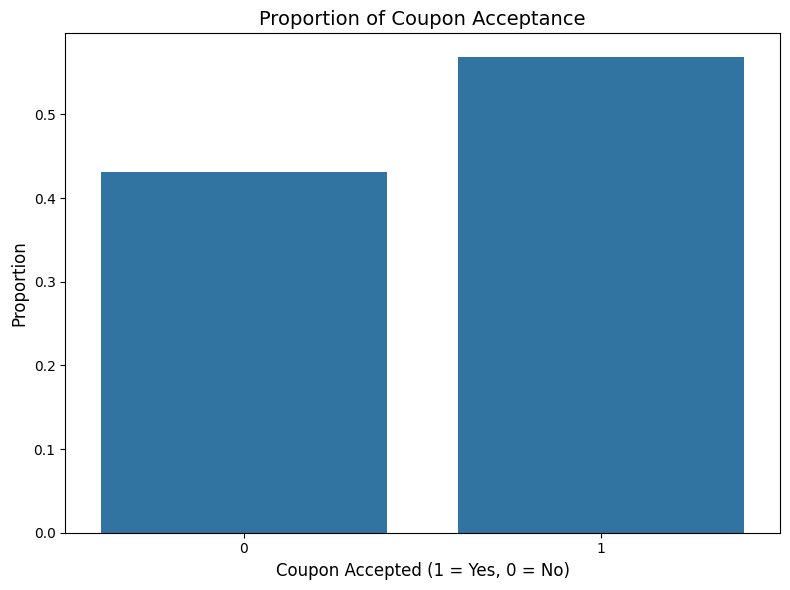

In [12]:

# Calculate the overall proportion of coupon accepted
acceptance = data['Y'].value_counts(normalize=True).reset_index()

# Rename columns
acceptance.columns = ['Coupon Accepted', 'Proportion']

# Visualize the proportion of coupon acceptance
plt.figure(figsize=(8, 6))
sns.barplot(x='Coupon Accepted', y='Proportion', data=acceptance)

# Add title and labels
plt.title('Proportion of Coupon Acceptance', fontsize=14)
plt.xlabel('Coupon Accepted (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

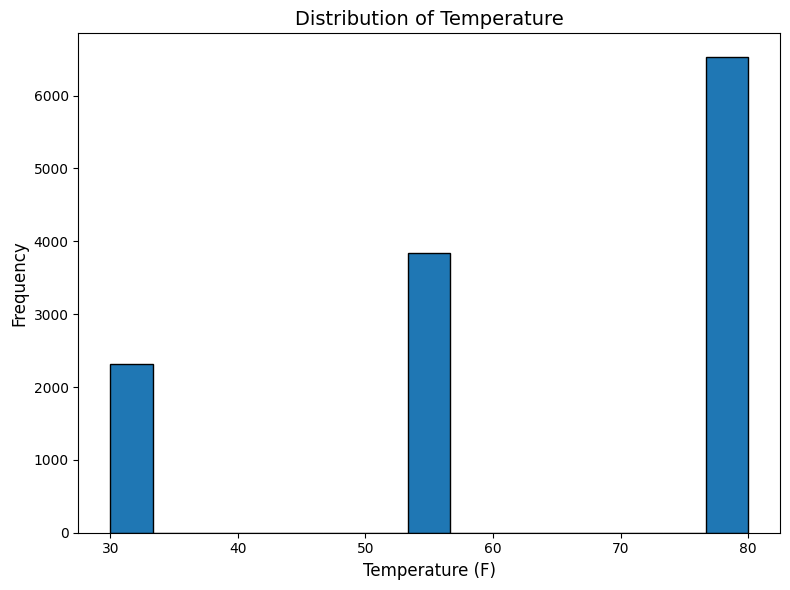

In [13]:
# Visualize the distribution of the 'temperature' column using a histogram
plt.figure(figsize=(8, 6))
plt.hist(data['temperature'], bins=15, edgecolor='black')

# Add title and labels
plt.title('Distribution of Temperature', fontsize=14)
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
# Create a dataframe that contains only the Coffee House coupons
bar_df = data[data['coupon'] == 'Bar']

# Display the first few rows of the coffeehouse coupon dataframe
bar_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [16]:
# Calculate the overall proportion of observations where the coupon was accepted (Y = 1)
total_acceptance_bar_rate = bar_df['Y'].mean()

# Display the result
total_acceptance_bar_rate

np.float64(0.41001487357461575)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_61605/2874680631.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bar_df['Bar'] = bar_df['Bar'].replace({'never': 0, 'less1': 1, '1~3': 3, '4~8': 4, 'gt8': 8})
/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_61605/2874680631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['Bar'] = bar_df['Bar'].replace({'never': 0, 'less1': 1, '1~3': 3, '4~8': 4, 'gt8': 8})


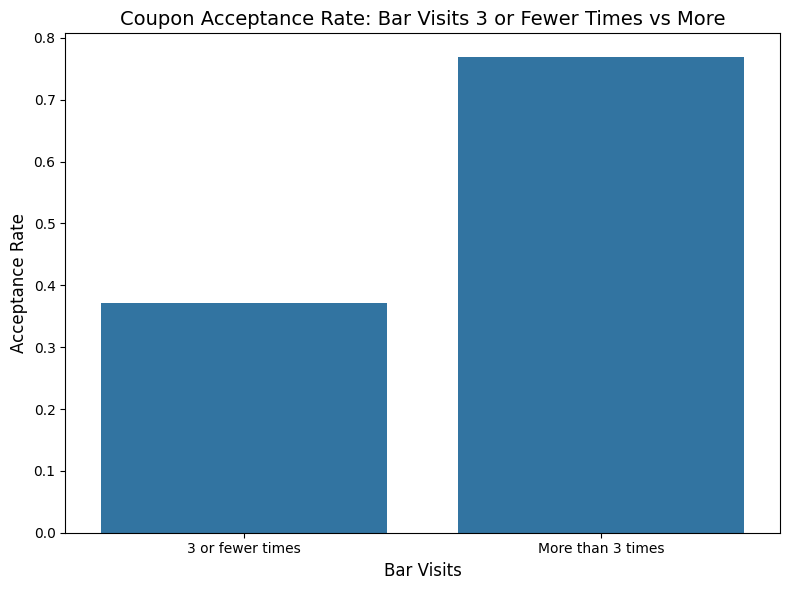

In [17]:
bar_df['Bar'] = bar_df['Bar'].replace({'never': 0, 'less1': 1, '1~3': 3, '4~8': 4, 'gt8': 8})

# Create two categories: those who went to the bar 3 or fewer times and those who went more
bar_group = bar_df.copy()
bar_group['Bar_Group'] = ['3 or fewer times' if x <= 3 else 'More than 3 times' for x in bar_group['Bar']]

# Calculate the acceptance rate for both groups
acceptance_rate_by_bar_group = bar_group.groupby('Bar_Group')['Y'].mean().reset_index()

# Visualize the acceptance rate comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Bar_Group', y='Y', data=acceptance_rate_by_bar_group)

# Add title and labels
plt.title('Coupon Acceptance Rate: Bar Visits 3 or Fewer Times vs More', fontsize=14)
plt.xlabel('Bar Visits', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


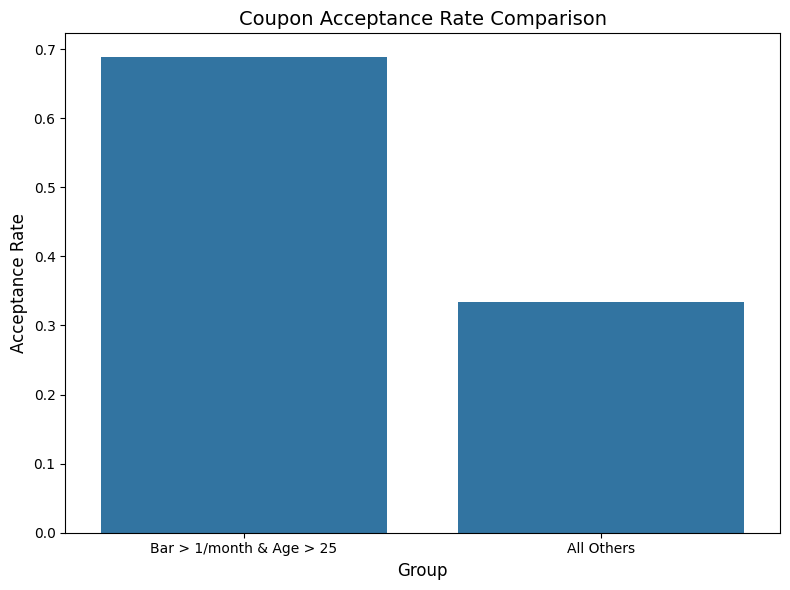

In [19]:
# We will filter directly based on age by selecting appropriate ranges
# Convert 'age' to string type and filter
group_1 = bar_df[(bar_df['Bar'] > 1) & (bar_df['age'].astype(str) > '25')]
group_2 = bar_df[~((bar_df['Bar'] > 1) & (bar_df['age'].astype(str) > '25'))]

# Calculate acceptance rate for both groups
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

# Create a dataframe to hold the two groups and their acceptance rates
acceptance_rate_comparison = pd.DataFrame({
    'Group': ['Bar > 1/month & Age > 25', 'All Others'],
    'Acceptance Rate': [acceptance_rate_group_1, acceptance_rate_group_2]
})

# Plot the acceptance rates comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rate_comparison)

# Add title and labels
plt.title('Coupon Acceptance Rate Comparison', fontsize=14)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [28]:
# Filter data based on the specified conditions
filtered_data = bar_df[
    (bar_df['Bar'] > 1) &  # More than once a month
    (bar_df['passanger'] != 'Kid(s)') &  # Passengers that were not kids
    (~bar_df['occupation'].isin(['Farming, Fishing, & Forestry']))  # Occupations other than farming, fishing, or forestry
    ]

# Calculate the acceptance rate for this filtered group
acceptance_rate_filtered = filtered_data['Y'].mean()

# Display the acceptance rate
acceptance_rate_filtered

np.float64(0.7132486388384754)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



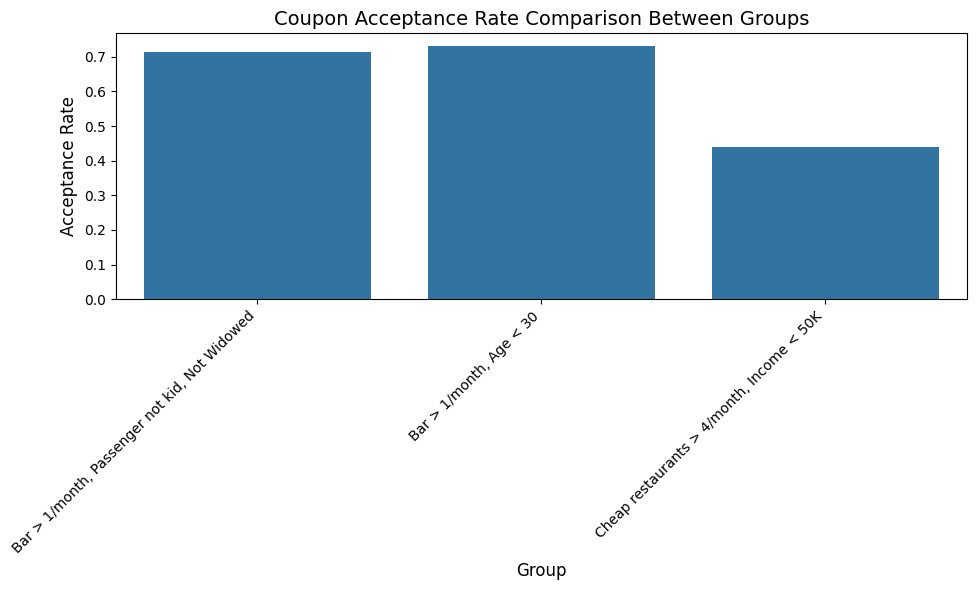

In [29]:
# Define the conditions for each group based on the criteria provided

# Group 1: Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
group_1 = bar_df[
    (bar_df['Bar'] > 1) &
    (bar_df['passanger'] != 'Kid(s)') &
    (bar_df['maritalStatus'] != 'Widowed')
]

# Group 2: Drivers who go to bars more than once a month and are under the age of 30
group_2 = bar_df[
    (bar_df['Bar'] > 1) &
    (bar_df['age'].astype(str) < '30')
]

# Group 3: Drivers who go to cheap restaurants (less than $20) more than 4 times a month and have an income of less than $50K
group_3 = bar_df[
    (bar_df['RestaurantLessThan20'].astype(str) > '4') &
    (bar_df['income'].astype(str) < '$50000')
]

# Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()
acceptance_rate_group_3 = group_3['Y'].mean()

# Create a dataframe to hold the groups and their acceptance rates
acceptance_rate_comparison = pd.DataFrame({
    'Group': [
        'Bar > 1/month, Passenger not kid, Not Widowed',
        'Bar > 1/month, Age < 30',
        'Cheap restaurants > 4/month, Income < 50K'
    ],
    'Acceptance Rate': [acceptance_rate_group_1, acceptance_rate_group_2, acceptance_rate_group_3]
})

# Plot the acceptance rates comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rate_comparison)

# Add title and labels
plt.title('Coupon Acceptance Rate Comparison Between Groups', fontsize=14)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who between 25 and 30 years old and going to there more than 1 time for a month will accept the coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [39]:
# Create a dataframe that contains only the Coffee House coupons
coffee_house_df = data[data['coupon'] == 'Coffee House']

# Display the first few rows of the coffeehouse coupon dataframe
coffee_house_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


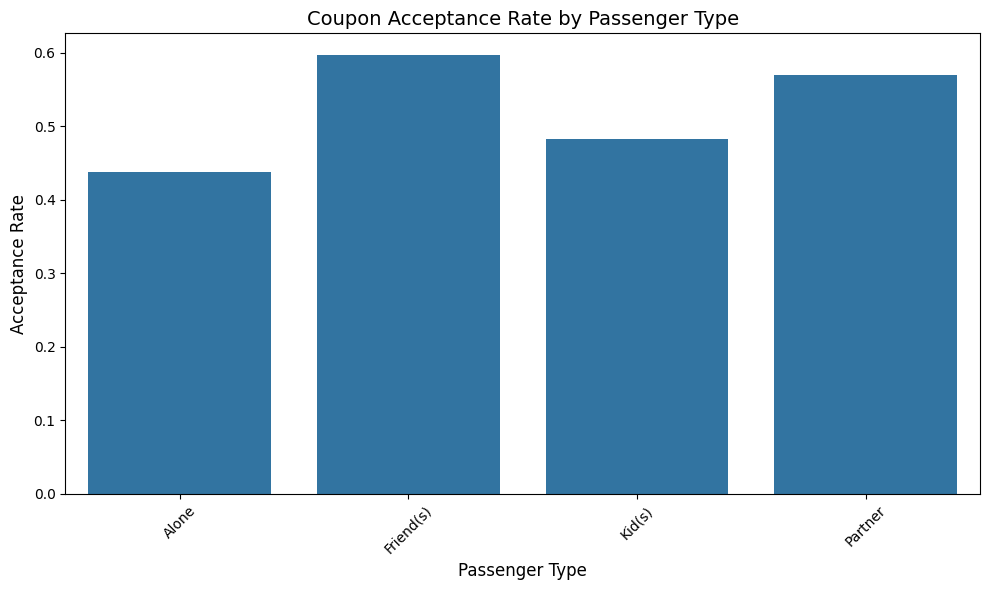

In [40]:
# Calculate the acceptance rate by passenger type
acceptance_rate_by_passenger = coffee_house_df.groupby('passanger')['Y'].mean().reset_index()

# Rename columns for clarity
acceptance_rate_by_passenger.columns = ['Passenger Type', 'Coupon Acceptance Rate']

# Visualize the acceptance rate by passenger type
plt.figure(figsize=(10, 6))
sns.barplot(x='Passenger Type', y='Coupon Acceptance Rate', data=acceptance_rate_by_passenger)

# Add title and labels
plt.title('Coupon Acceptance Rate by Passenger Type', fontsize=14)
plt.xlabel('Passenger Type', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

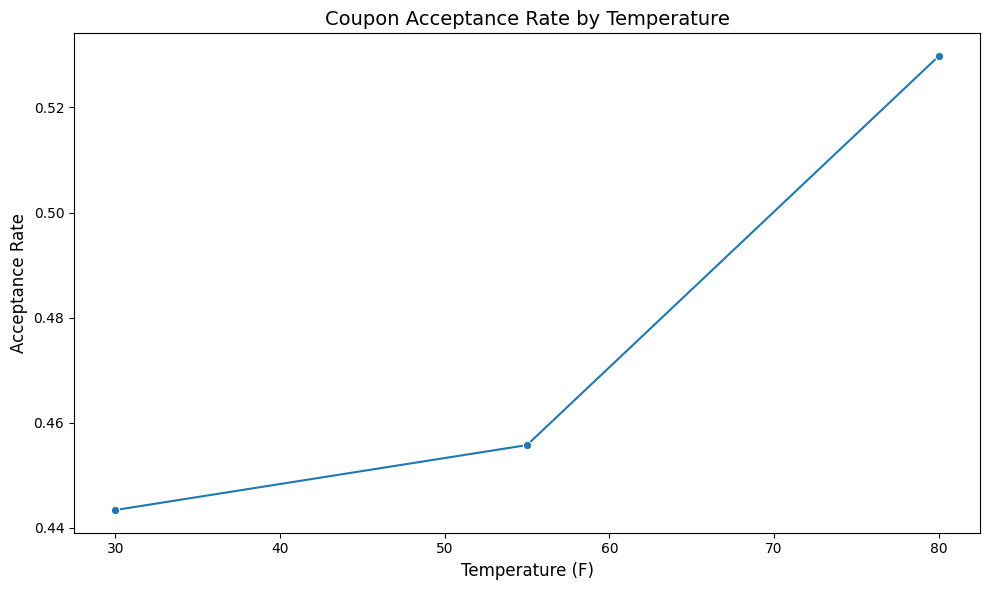

In [41]:
# Group the data by temperature and calculate the acceptance rate
acceptance_rate_by_temperature = coffee_house_coupons_df.groupby('temperature')['Y'].mean().reset_index()

# Rename columns for clarity
acceptance_rate_by_temperature.columns = ['Temperature', 'Coupon Acceptance Rate']

# Visualize the acceptance rate by temperature
plt.figure(figsize=(10, 6))
sns.lineplot(x='Temperature', y='Coupon Acceptance Rate', data=acceptance_rate_by_temperature, marker='o')

# Add title and labels
plt.title('Coupon Acceptance Rate by Temperature', fontsize=14)
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

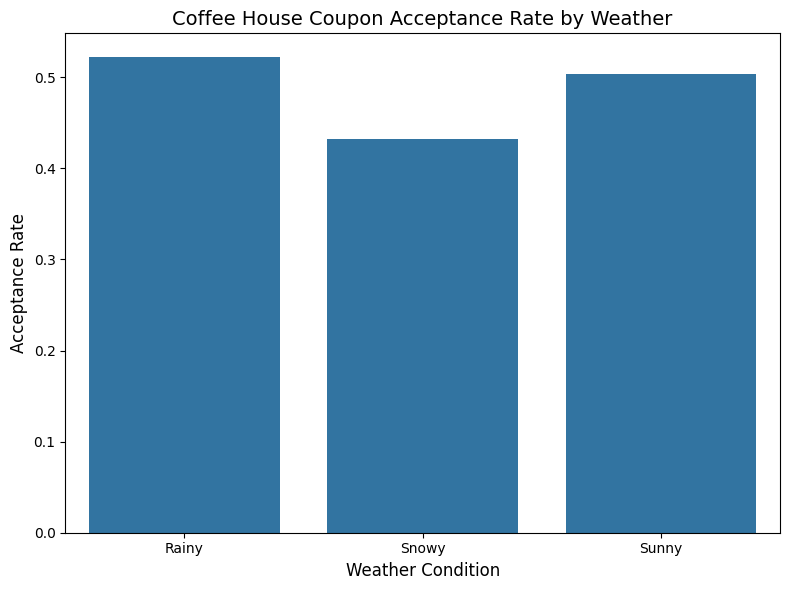

In [43]:
# Calculate the acceptance rate for Coffee House coupons under different weather conditions
coffee_house_weather_acceptance = coffee_house_df.groupby('weather')['Y'].mean().reset_index()

# Rename columns for clarity
coffee_house_weather_acceptance.columns = ['Weather', 'Coupon Acceptance Rate']

# Visualize the acceptance rate by weather for Coffee House coupons
plt.figure(figsize=(8, 6))
sns.barplot(x='Weather', y='Coupon Acceptance Rate', data=coffee_house_weather_acceptance)

# Add title and labels
plt.title('Coffee House Coupon Acceptance Rate by Weather', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

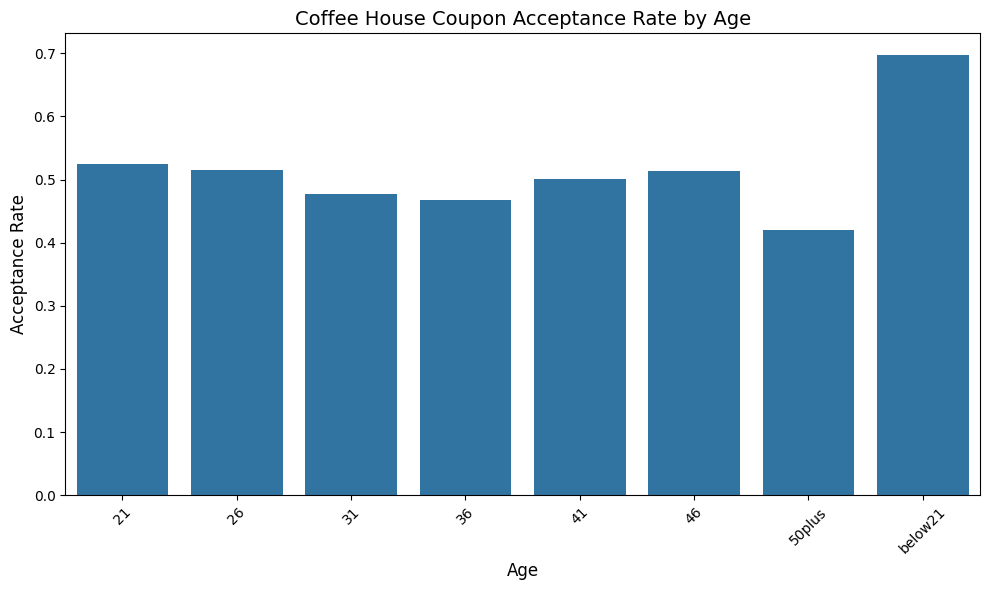

In [45]:
# Calculate the acceptance rate for Coffee House coupons by age
acceptance_rate_by_age = coffee_house_df.groupby('age')['Y'].mean().reset_index()

# Rename columns for clarity
acceptance_rate_by_age.columns = ['Age', 'Coupon Acceptance Rate']

# Visualize the acceptance rate by age for Coffee House coupons
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Coupon Acceptance Rate', data=acceptance_rate_by_age)

# Add title and labels
plt.title('Coffee House Coupon Acceptance Rate by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_61605/2722684202.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  coffee_house_df['CoffeeHouse'] = coffee_house_df['CoffeeHouse'].replace({'never': 0, 'less1': 1, '1~3': 3, '4~8': 4, 'gt8': 8})
/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_61605/2722684202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_house_df['CoffeeHouse'] = coffee_house_df['CoffeeHouse'].replace({'never': 0, 'less1': 1, '1~3': 3, '4~8': 4, 'gt8': 8})


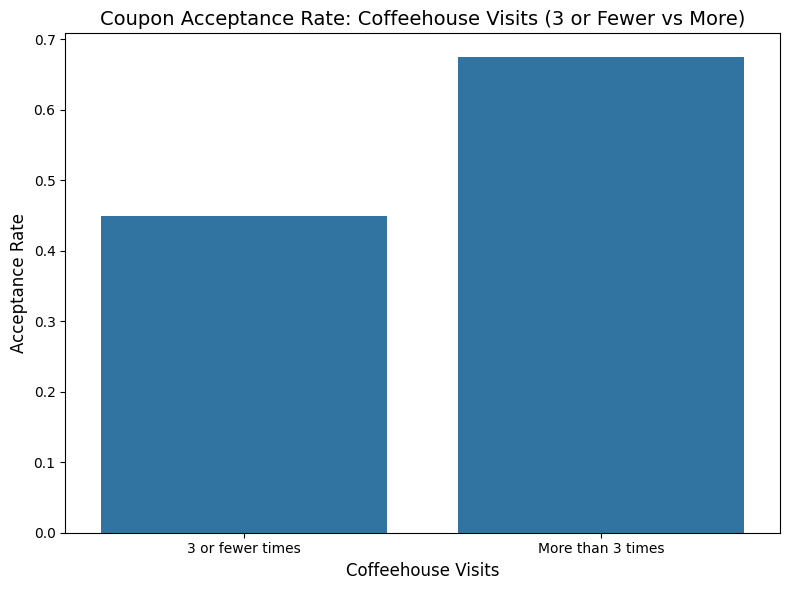

In [46]:
# Create two groups based on the frequency of visiting coffee houses
coffee_house_df['CoffeeHouse'] = coffee_house_df['CoffeeHouse'].replace({'never': 0, 'less1': 1, '1~3': 3, '4~8': 4, 'gt8': 8})

# Create two categories: those who went to the coffee house 3 or fewer times and those who went more
coffee_house_group = coffee_house_df.copy()
coffee_house_group['CoffeeHouse_Group'] = ['3 or fewer times' if x <= 3 else 'More than 3 times' for x in coffee_house_group['CoffeeHouse']]

# Calculate the acceptance rate for both groups
acceptance_rate_by_coffee_group = coffee_house_group.groupby('CoffeeHouse_Group')['Y'].mean().reset_index()

# Visualize the acceptance rate comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='CoffeeHouse_Group', y='Y', data=acceptance_rate_by_coffee_group)

# Add title and labels
plt.title('Coupon Acceptance Rate: Coffeehouse Visits (3 or Fewer vs More)', fontsize=14)
plt.xlabel('Coffeehouse Visits', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

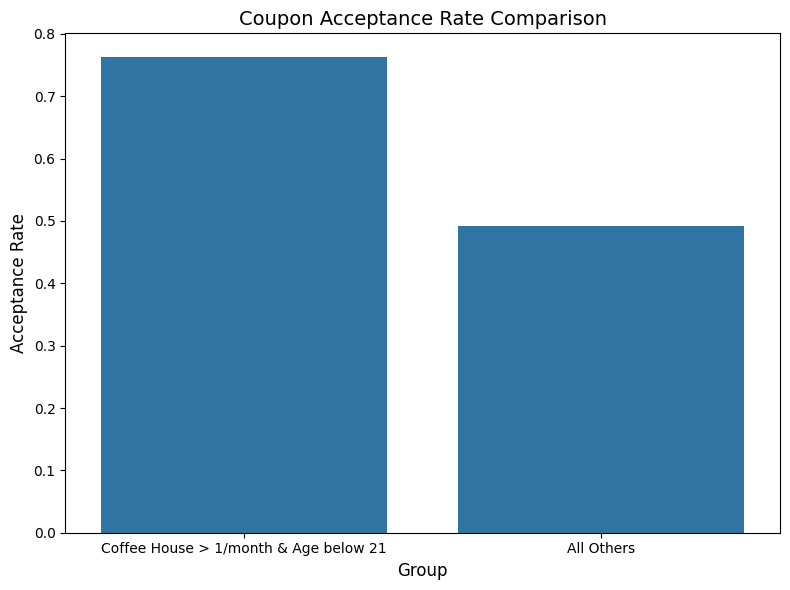

In [53]:
# We will filter directly based on age by selecting appropriate ranges
# Convert 'age' to string type and filter
group_1 = coffee_house_df[(coffee_house_df['CoffeeHouse'] > 1) & (coffee_house_df['age'].astype(str) == 'below21')]
group_2 = coffee_house_df[~((coffee_house_df['CoffeeHouse'] > 1) & (coffee_house_df['age'].astype(str) == 'below21'))]

# Calculate acceptance rate for both groups
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

# Create a dataframe to hold the two groups and their acceptance rates
acceptance_rate_comparison = pd.DataFrame({
    'Group': ['Coffee House > 1/month & Age below 21', 'All Others'],
    'Acceptance Rate': [acceptance_rate_group_1, acceptance_rate_group_2]
})

# Plot the acceptance rates comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rate_comparison)

# Add title and labels
plt.title('Coupon Acceptance Rate Comparison', fontsize=14)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Based on the Investigation on the coffee house coupon the passanger who are below 21 are more interested to go coffee house rather than 21 or older. and when the weather is sunny passenger will consider going to coffee house rather than when snowy or rainy. and acceptance rate for the 21 age younger and going more than one a month to coffee house is 75%.